In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\Arosh\AppData\Local\Temp/ipykernel_18612/3294234976.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df=pd.read_csv('Dataset/gold_price_data.csv',index_col=0,parse_dates=True) #reading the data and coverting Date cloum into index
df.head()

,Value
Date,
1970-01-01,35.2
1970-01-04,35.1
1970-01-07,35.4
1970-01-10,36.2
1971-01-01,37.4


In [3]:
df.columns

Index(['Value'], dtype='object')

<AxesSubplot:xlabel='Date'>

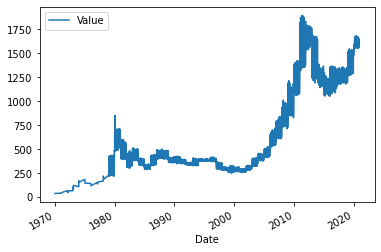

In [4]:
df.plot()

In [5]:
df.isna().sum()  #checking for null values

Value    0
dtype: int64

In [6]:
timeSeries = df.copy()

Checking the Data is stationary or not

array([[<AxesSubplot:title={'center':'Value'}>]], dtype=object)

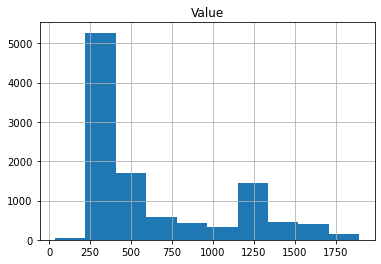

In [7]:
timeSeries.hist()

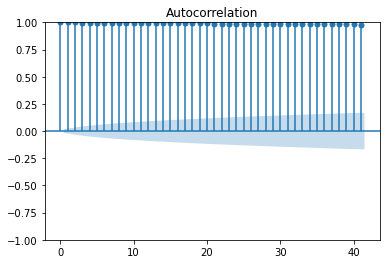

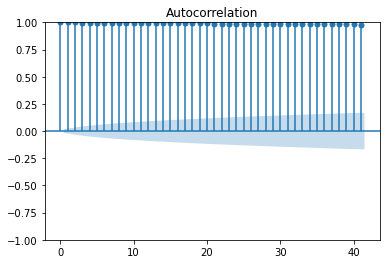

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(timeSeries)

In [9]:
timeSeries.shape

(10787, 1)

In [10]:
data1 = timeSeries[0:5394]
data2 = timeSeries[5394:]

In [11]:
data1.size

5394

In [12]:
data2.size

5393

In [13]:
data1.mean()

Value    381.351481
dtype: float64

In [14]:
data2.mean()

Value    925.892268
dtype: float64

In [15]:
data1.var()

Value    6167.576533
dtype: float64

In [16]:
data2.var()

Value    222363.129839
dtype: float64

In [17]:
from statsmodels.tsa.stattools import adfuller

C:\Users\HP\AppData\Local\Temp/ipykernel_13128/950759743.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [18]:
test_result=adfuller(timeSeries['Value'])

In [19]:
def adfuller_test(Value):
    result=adfuller(Value)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if test_result[1] <= 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary ")

adfuller_test(timeSeries['Value'])

Data is non-stationary 
ADF Test Statistic : -0.07112124453813368
p-value : 0.9522400769147396
#Lags Used : 39
Number of Observations : 10747


Change the data to stationary

In [20]:
timeSeries['First Difference'] = timeSeries.diff().dropna()

In [21]:
timeSeries['Seasonal First Difference']=timeSeries['Value']-timeSeries['Value'].shift(12)

In [22]:
timeSeries.head(20)

,Value,First Difference,Seasonal First Difference
Date,,,
1970-01-01,35.2,NaN,NaN
1970-01-04,35.1,-0.1,NaN
1970-01-07,35.4,0.3,NaN
1970-01-10,36.2,0.8,NaN
1971-01-01,37.4,1.2,NaN
1971-01-04,38.9,1.5,NaN
1971-01-07,40.1,1.2,NaN
1971-01-10,42.0,1.9,NaN
1972-03-01,43.5,1.5,NaN


In [23]:
adfuller_test(timeSeries['Seasonal First Difference'].dropna())

ADF Test Statistic : -14.980483866744711
p-value : 1.1640981457203665e-27
#Lags Used : 39
Number of Observations : 10735


In [24]:
adfuller_test(timeSeries['First Difference'].dropna())

ADF Test Statistic : -17.568807521617543
p-value : 4.061374360446186e-30
#Lags Used : 38
Number of Observations : 10747


<AxesSubplot:xlabel='Date'>

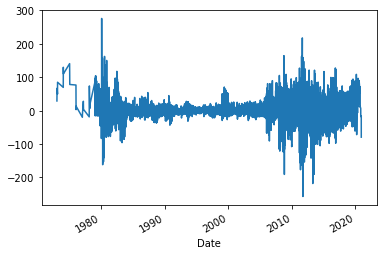

In [25]:
timeSeries['Seasonal First Difference'].plot()

In [26]:
df.isna().sum()

Value    0
dtype: int64

In [6]:
timeSeries = df.copy()

array([[<AxesSubplot:title={'center':'Value'}>]], dtype=object)

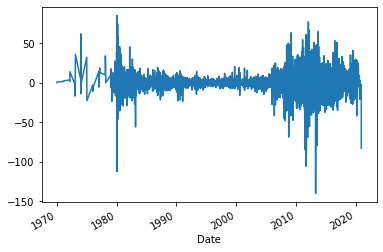

In [7]:
timeSeries['First Difference'].plot()

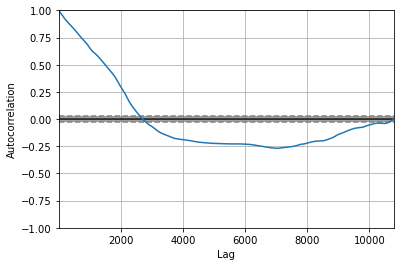

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(timeSeries['Value'])
plt.show()

Identify the parameters(p,d,q)

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

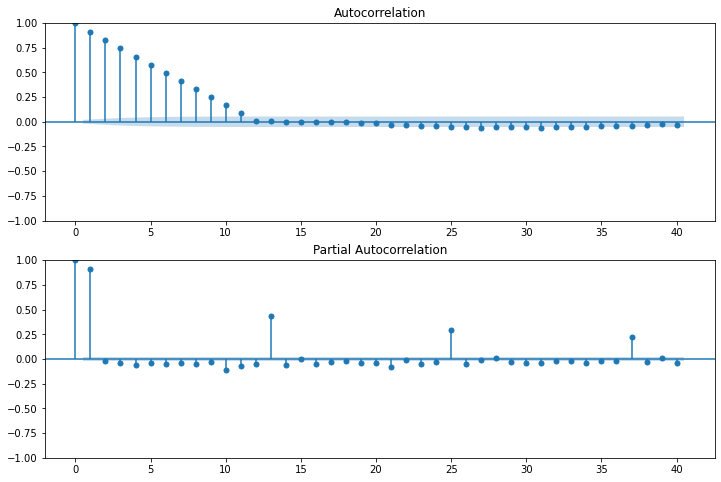

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(timeSeries['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(timeSeries['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(timeSeries['Value'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=78048.396, Time=13.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78090.196, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78090.620, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=78090.554, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=78090.847, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=78081.191, Time=7.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=78081.126, Time=6.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=78049.950, Time=13.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=78084.745, Time=7.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=78088.281, Time=4.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=78082.704, Time=6.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=78082.775, Time=5.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=78086.029, Time=16.92 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=78049.141, Time=3.43 sec

Best model:  AR

In [32]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(timeSeries['Value'], order=(2,1,2))
model_fit=model.fit()

C:\Users\Arosh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arosh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arosh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arosh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arosh\miniconda3\lib\

In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                10787
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -39019.571
Date:                Fri, 27 May 2022   AIC                          78049.141
Time:                        23:13:52   BIC                          78085.571
Sample:                             0   HQIC                         78061.426
                              - 10787                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7039      0.011    -65.282      0.000      -0.725      -0.683
ar.L2         -0.9375      0.010    -93.302      0.000      -0.957      -0.918
ma.L1          0.6847      0.012     55.872      0.000       0.661       0.709
ma.L2          0.9175      0.012     79.200      0.000       0.895       0.940
sigma2        81.2353      0.325    249.807      0.000      80.598      81.873
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):            210437.80
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

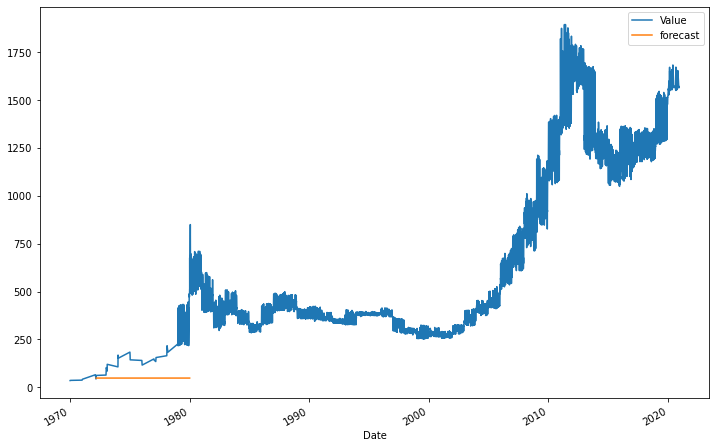

In [34]:
timeSeries['forecast']=model_fit.predict(start=10,end=300,dynamic=True)
timeSeries[['Value','forecast']].plot(figsize=(12,8))

In [35]:
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\Arosh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arosh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arosh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arosh\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arosh\miniconda3\lib\

<AxesSubplot:xlabel='Date'>

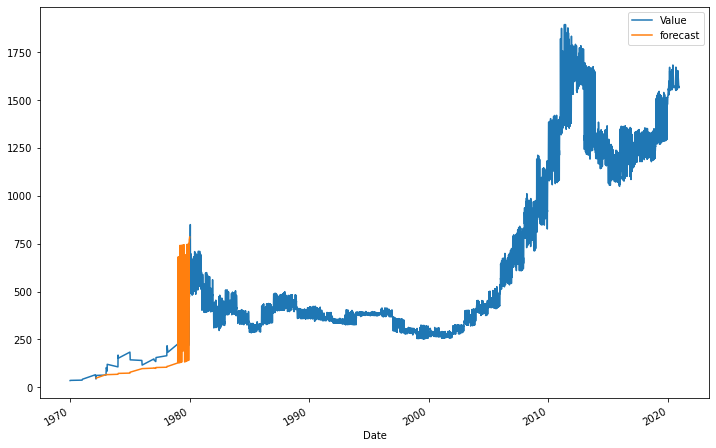

In [36]:
df['forecast']=results.predict(start=10,end=300,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))